In [12]:
import pyart
from copy import deepcopy
import numpy as np

%matplotlib inline

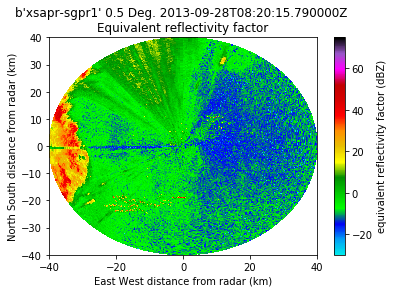

In [10]:
radar = pyart.io.read('/data/xsapr_test_case/XNW130928082000.RAW1HE0')
radar.scan_type
myd = pyart.graph.RadarDisplay(radar)
myd.plot_ppi('reflectivity', 0)

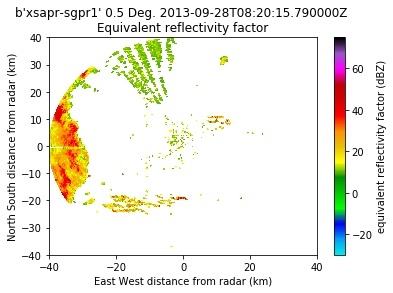

In [11]:
gf = pyart.filters.GateFilter(radar)
gf.exclude_below('reflectivity', 10)
myd = pyart.graph.RadarDisplay(radar)
myd.plot_ppi('reflectivity', 0, gatefilter=gf)

In [15]:
nf = deepcopy(radar.fields['reflectivity'])
nf['data'] = np.ma.masked_where(gf.gate_excluded, nf['data'])
radar.add_field('filtered_refectivity', nf, replace_existing=True)

In [16]:
pyart.io.write_cfradial('/data/xsapr_test_case/testme.cf', radar)

In [ ]:
frad = pyart.io.read('/data/xsapr_test_case/testme.cf')
myd = pyart.graph.RadarDisplay(frad)
myd.plot_ppi('reflectivity', 0)